In [1]:
using JLD2, FlavellBase, ImageDataIO, SegmentationTools, BehaviorDataNIR, HDF5, UNet2D, ProgressMeter, Random, Plots, NRRDIO, Statistics, StatsBase, PyPlot

┌ Warning: You are using a non-official build of Julia. This may cause issues with CUDA.jl.
│ Please consider using an official build from https://julialang.org/downloads/.
└ @ CUDA ~/.julia/packages/CUDA/75aiI/src/initialization.jl:180


WebIO._IJuliaInit()

### Pre-CropNet datasets

In [2]:
# Define base project directories
prj_5ht_dir = "/data3/prj_5ht/published_data/data_processed_neuropal"
prj_starvation_dir = "/data1/prj_starvation/data_processed"
prj_neuropal_dir = "/store1/prj_neuropal/data_processed"
prj_rim_dir = "/store1/prj_rim/data_processed"
prj_aversion_dir = "/data1/prj_aversion/data_processed"
prj_new_cam_dir = "/store1/candy/prj_starvation/data_processed"

# Create the dataset paths dictionary
dataset_paths = Dict(
    # prj_5ht datasets
    "2022-07-26-38" => "$(prj_5ht_dir)/2022-07-26-38_output",
    "2022-07-27-45" => "$(prj_5ht_dir)/2022-07-27-45_output",
    "2022-08-02-31" => "$(prj_5ht_dir)/2022-08-02-31_output",
    "2022-07-26-31" => "$(prj_5ht_dir)/2022-07-26-31_output",
    "2022-07-27-31" => "$(prj_5ht_dir)/2022-07-27-31_output",
    "2022-07-27-52" => "$(prj_5ht_dir)/2022-07-27-52_output",
    "2022-08-02-38" => "$(prj_5ht_dir)/2022-08-02-38_output",
    "2022-08-02-45" => "$(prj_5ht_dir)/2022-08-02-45_output",
    "2022-08-03-31" => "$(prj_5ht_dir)/2022-08-03-31_output",
    "2022-08-03-38" => "$(prj_5ht_dir)/2022-08-03-38_output",

    # prj_starvation datasets
    "2023-09-13-02" => "$(prj_starvation_dir)/2023-09-13-02_output",
    "2023-09-29-01" => "$(prj_starvation_dir)/2023-09-29-01_output",
    "2023-07-24-20" => "$(prj_starvation_dir)/2023-07-24-20_output",
    "2023-07-25-01" => "$(prj_starvation_dir)/2023-07-25-01_output",
    "2023-08-01-01" => "$(prj_starvation_dir)/2023-08-01-01_output",
    "2023-09-06-01" => "$(prj_starvation_dir)/2023-09-06-01_output",
    "2023-09-19-01" => "$(prj_starvation_dir)/2023-09-19-01_output",
    "2023-09-27-14" => "$(prj_starvation_dir)/2023-09-27-14_output",
    "2023-05-04-01" => "$(prj_starvation_dir)/2023-05-04-01_output",
    "2023-05-04-07" => "$(prj_starvation_dir)/2023-05-04-07_output",
    "2023-05-25-01" => "$(prj_starvation_dir)/2023-05-25-01_output",
    "2023-05-25-08" => "$(prj_starvation_dir)/2023-05-25-08_output",
    "2023-05-26-01" => "$(prj_starvation_dir)/2023-05-26-01_output",
    "2023-05-26-08" => "$(prj_starvation_dir)/2023-05-26-08_output",
    "2023-05-26-19" => "$(prj_starvation_dir)/2023-05-26-19_output",
    "2023-05-30-01" => "$(prj_starvation_dir)/2023-05-30-01_output",
    "2023-05-30-14" => "$(prj_starvation_dir)/2023-05-30-14_output",
    "2023-05-31-01" => "$(prj_starvation_dir)/2023-05-31-01_output",
    "2023-06-04-02" => "$(prj_starvation_dir)/2023-06-04-02_output",
    "2023-06-04-13" => "$(prj_starvation_dir)/2023-06-04-13_output",
    "2023-06-05-01" => "$(prj_starvation_dir)/2023-06-05-01_output",
    "2023-06-05-10" => "$(prj_starvation_dir)/2023-06-05-10_output",
    "2023-06-05-27" => "$(prj_starvation_dir)/2023-06-05-27_output",
    "2023-07-24-01" => "$(prj_starvation_dir)/2023-07-24-01_output",
    "2023-07-24-12" => "$(prj_starvation_dir)/2023-07-24-12_output",
    "2023-07-24-27" => "$(prj_starvation_dir)/2023-07-24-27_output",
    "2023-07-25-10" => "$(prj_starvation_dir)/2023-07-25-10_output",
    "2023-07-25-11" => "$(prj_starvation_dir)/2023-07-25-11_output",
    "2023-07-25-18" => "$(prj_starvation_dir)/2023-07-25-18_output",
    "2023-07-31-01" => "$(prj_starvation_dir)/2023-07-31-01_output",
    "2023-07-31-09" => "$(prj_starvation_dir)/2023-07-31-09_output",
    "2023-08-02-01" => "$(prj_starvation_dir)/2023-08-02-01_output",
    "2023-08-02-10" => "$(prj_starvation_dir)/2023-08-02-10_output",
    "2023-08-02-17" => "$(prj_starvation_dir)/2023-08-02-17_output",
    "2023-09-05-01" => "$(prj_starvation_dir)/2023-09-05-01_output",
    "2023-09-05-07" => "$(prj_starvation_dir)/2023-09-05-07_output",
    "2023-09-05-13" => "$(prj_starvation_dir)/2023-09-05-13_output",
    "2023-09-06-12" => "$(prj_starvation_dir)/2023-09-06-12_output",
    "2023-09-06-19" => "$(prj_starvation_dir)/2023-09-06-19_output",
    "2023-09-12-01" => "$(prj_starvation_dir)/2023-09-12-01_output",
    "2023-09-12-12" => "$(prj_starvation_dir)/2023-09-12-12_output",
    "2023-09-13-09" => "$(prj_starvation_dir)/2023-09-13-09_output",
    "2023-09-27-01" => "$(prj_starvation_dir)/2023-09-27-01_output",
    "2023-09-27-08" => "$(prj_starvation_dir)/2023-09-27-08_output",
    "2023-09-29-19" => "$(prj_starvation_dir)/2023-09-29-19_output",
    "2023-10-06-01" => "$(prj_starvation_dir)/2023-10-06-01_output",
    "2023-10-06-07" => "$(prj_starvation_dir)/2023-10-06-07_output",
    "2023-10-06-14" => "$(prj_starvation_dir)/2023-10-06-14_output",
    "2023-10-09-01" => "$(prj_starvation_dir)/2023-10-09-01_output",
    "2023-10-09-07" => "$(prj_starvation_dir)/2023-10-09-07_output",
    "2023-10-09-17" => "$(prj_starvation_dir)/2023-10-09-17_output",
    "2023-10-09-23" => "$(prj_starvation_dir)/2023-10-09-23_output",
    "2023-10-11-01" => "$(prj_starvation_dir)/2023-10-11-01_output",
    "2023-10-11-07" => "$(prj_starvation_dir)/2023-10-11-07_output",
    "2023-10-11-16" => "$(prj_starvation_dir)/2023-10-11-16_output",
    "2023-10-13-01" => "$(prj_starvation_dir)/2023-10-13-01_output",
    "2023-10-13-08" => "$(prj_starvation_dir)/2023-10-13-08_output",
    "2023-10-13-13" => "$(prj_starvation_dir)/2023-10-13-13_output",
    "2023-10-13-20" => "$(prj_starvation_dir)/2023-10-13-20_output",

    # prj_neuropal datasets
    "2022-06-14-07" => "$(prj_neuropal_dir)/2022-06-14-07_output",
    "2022-08-02-01" => "$(prj_neuropal_dir)/2022-08-02-01_output",
    "2023-01-23-08" => "$(prj_neuropal_dir)/2023-01-23-08_output",
    "2023-03-07-01" => "$(prj_neuropal_dir)/2023-03-07-01_output",
    "2022-01-06-01" => "$(prj_neuropal_dir)/2022-01-06-01_output",
    "2022-05-17-01" => "$(prj_neuropal_dir)/2022-05-17-01_output",
    "2022-05-17-06" => "$(prj_neuropal_dir)/2022-05-17-06_output",
    "2022-05-25-02" => "$(prj_neuropal_dir)/2022-05-25-02_output",
    "2022-06-14-01" => "$(prj_neuropal_dir)/2022-06-14-01_output",
    "2022-06-14-13" => "$(prj_neuropal_dir)/2022-06-14-13_output",
    "2022-06-28-01" => "$(prj_neuropal_dir)/2022-06-28-01_output",
    "2022-06-28-07" => "$(prj_neuropal_dir)/2022-06-28-07_output",
    "2022-07-12-13" => "$(prj_neuropal_dir)/2022-07-12-13_output",
    "2022-07-15-06" => "$(prj_neuropal_dir)/2022-07-15-06_output",
    "2022-07-15-12" => "$(prj_neuropal_dir)/2022-07-15-12_output",
    "2022-07-19-01" => "$(prj_neuropal_dir)/2022-07-19-01_output",
    "2022-07-20-01" => "$(prj_neuropal_dir)/2022-07-20-01_output",
    "2022-07-26-01" => "$(prj_neuropal_dir)/2022-07-26-01_output",
    "2022-07-29-01" => "$(prj_neuropal_dir)/2022-07-29-01_output",
    "2022-07-29-08" => "$(prj_neuropal_dir)/2022-07-29-08_output",
    "2022-12-21-06" => "$(prj_neuropal_dir)/2022-12-21-06_output",
    "2023-01-05-01" => "$(prj_neuropal_dir)/2023-01-05-01_output",
    "2023-01-05-10" => "$(prj_neuropal_dir)/2023-01-05-10_output",
    "2023-01-05-18" => "$(prj_neuropal_dir)/2023-01-05-18_output",
    "2023-01-06-01" => "$(prj_neuropal_dir)/2023-01-06-01_output",
    "2023-01-06-08" => "$(prj_neuropal_dir)/2023-01-06-08_output",
    "2023-01-06-15" => "$(prj_neuropal_dir)/2023-01-06-15_output",
    "2023-01-09-01" => "$(prj_neuropal_dir)/2023-01-09-01_output",
    "2023-01-09-08" => "$(prj_neuropal_dir)/2023-01-09-08_output",
    "2023-01-09-15" => "$(prj_neuropal_dir)/2023-01-09-15_output",
    "2023-01-09-22" => "$(prj_neuropal_dir)/2023-01-09-22_output",
    "2023-01-09-28" => "$(prj_neuropal_dir)/2023-01-09-28_output",
    "2023-01-10-01" => "$(prj_neuropal_dir)/2023-01-10-01_output",
    "2023-01-10-07" => "$(prj_neuropal_dir)/2023-01-10-07_output",
    "2023-01-10-14" => "$(prj_neuropal_dir)/2023-01-10-14_output",
    "2023-01-13-01" => "$(prj_neuropal_dir)/2023-01-13-01_output",
    "2023-01-13-07" => "$(prj_neuropal_dir)/2023-01-13-07_output",
    "2023-01-16-01" => "$(prj_neuropal_dir)/2023-01-16-01_output",
    "2023-01-16-08" => "$(prj_neuropal_dir)/2023-01-16-08_output",

    # prj_rim datasets
    # "2023-06-09-01" => "$(prj_rim_dir)/2023-06-09-01_output",
    # "2023-06-09-10" => "$(prj_rim_dir)/2023-06-09-10_output",
    # "2023-06-24-02" => "$(prj_rim_dir)/2023-06-24-02_output",
    # "2023-06-24-11" => "$(prj_rim_dir)/2023-06-24-11_output",
    # "2023-06-24-19" => "$(prj_rim_dir)/2023-06-24-19_output",
    # "2023-06-24-28" => "$(prj_rim_dir)/2023-06-24-28_output",
    # "2023-07-01-01" => "$(prj_rim_dir)/2023-07-01-01_output",
    # "2023-07-01-09" => "$(prj_rim_dir)/2023-07-01-09_output",
    # "2023-07-01-23" => "$(prj_rim_dir)/2023-07-01-23_output",
    # "2023-07-01-30" => "$(prj_rim_dir)/2023-07-01-30_output",
    # "2023-07-07-01" => "$(prj_rim_dir)/2023-07-07-01_output",
    # "2023-07-07-11" => "$(prj_rim_dir)/2023-07-07-11_output",
    # "2023-07-07-18" => "$(prj_rim_dir)/2023-07-07-18_output",
    # "2023-07-08-06" => "$(prj_rim_dir)/2023-07-08-06_output",
    # "2023-07-11-02" => "$(prj_rim_dir)/2023-07-11-02_output",
    # "2023-07-12-01" => "$(prj_rim_dir)/2023-07-12-01_output",
    # "2023-07-13-01" => "$(prj_rim_dir)/2023-07-13-01_output",
    # "2023-07-13-09" => "$(prj_rim_dir)/2023-07-13-09_output",
    # "2023-07-13-17" => "$(prj_rim_dir)/2023-07-13-17_output",
    # "2023-07-16-02" => "$(prj_rim_dir)/2023-07-16-02_output",
    # "2023-07-28-04" => "$(prj_rim_dir)/2023-07-28-04_output",
    # "2023-08-07-08" => "$(prj_rim_dir)/2023-08-07-08_output",
    # "2023-08-07-16" => "$(prj_rim_dir)/2023-08-07-16_output",
    # "2023-08-18-11" => "$(prj_rim_dir)/2023-08-18-11_output",
    # "2023-08-18-18" => "$(prj_rim_dir)/2023-08-18-18_output",
    # "2023-08-19-01" => "$(prj_rim_dir)/2023-08-19-01_output",
    # "2023-08-22-01" => "$(prj_rim_dir)/2023-08-22-01_output",
    # "2023-08-22-08" => "$(prj_rim_dir)/2023-08-22-08_output",
    # "2023-08-23-02" => "$(prj_rim_dir)/2023-08-23-02_output",
    # "2023-08-23-09" => "$(prj_rim_dir)/2023-08-23-09_output",
    # "2023-08-23-23" => "$(prj_rim_dir)/2023-08-23-23_output",
    # "2023-08-24-03" => "$(prj_rim_dir)/2023-08-24-03_output",
    # "2023-08-25-02" => "$(prj_rim_dir)/2023-08-25-02_output",
    # "2023-08-25-09" => "$(prj_rim_dir)/2023-08-25-09_output",
    # "2023-08-31-03" => "$(prj_rim_dir)/2023-08-31-03_output",
    # "2023-09-01-01" => "$(prj_rim_dir)/2023-09-01-01_output",
    # "2023-09-02-10" => "$(prj_rim_dir)/2023-09-02-10_output",
    # "2023-09-15-01" => "$(prj_rim_dir)/2023-09-15-01_output",
    # "2023-09-15-08" => "$(prj_rim_dir)/2023-09-15-08_output",
    # "2023-10-03-02" => "$(prj_rim_dir)/2023-10-03-02_output",
    # "2023-10-15-18" => "$(prj_rim_dir)/2023-10-15-18_output",
    # "2024-04-12-04" => "$(prj_rim_dir)/2024-04-12-04_output",
    # "2024-04-14-06" => "$(prj_rim_dir)/2024-04-14-06_output",
    # "2024-04-14-15" => "$(prj_rim_dir)/2024-04-14-15_output",
    # "2024-04-15-03" => "$(prj_rim_dir)/2024-04-15-03_output",
    # "2024-04-21-05" => "$(prj_rim_dir)/2024-04-21-05_output",
    # "2024-04-25-07" => "$(prj_rim_dir)/2024-04-25-07_output",
    # "2024-05-02-04" => "$(prj_rim_dir)/2024-05-02-04_output",
    # "2024-05-02-13" => "$(prj_rim_dir)/2024-05-02-13_output",
    # "2024-05-03-09" => "$(prj_rim_dir)/2024-05-03-09_output",
    # "2024-05-09-13" => "$(prj_rim_dir)/2024-05-09-13_output",

    # prj_aversion datasets
    "2023-03-30-01" => "$(prj_aversion_dir)/2023-03-30-01_output",
    "2023-06-21-01" => "$(prj_aversion_dir)/2023-06-21-01_output",
    "2023-06-23-08" => "$(prj_aversion_dir)/2023-06-23-08_output",
    "2023-06-29-01" => "$(prj_aversion_dir)/2023-06-29-01_output",
    "2023-06-29-13" => "$(prj_aversion_dir)/2023-06-29-13_output",
    "2023-07-14-08" => "$(prj_aversion_dir)/2023-07-14-08_output",
    "2023-07-14-14" => "$(prj_aversion_dir)/2023-07-14-14_output",
    "2023-07-27-01" => "$(prj_aversion_dir)/2023-07-27-01_output",
    "2023-07-27-08" => "$(prj_aversion_dir)/2023-07-27-08_output",
    "2023-08-08-07" => "$(prj_aversion_dir)/2023-08-08-07_output",
    "2023-08-14-01" => "$(prj_aversion_dir)/2023-08-14-01_output",
    "2023-08-15-01" => "$(prj_aversion_dir)/2023-08-15-01_output",
    "2023-08-16-01" => "$(prj_aversion_dir)/2023-08-16-01_output",
    "2023-08-21-01" => "$(prj_aversion_dir)/2023-08-21-01_output",
    "2023-09-07-01" => "$(prj_aversion_dir)/2023-09-07-01_output",
    "2023-09-14-01" => "$(prj_aversion_dir)/2023-09-14-01_output",
    "2023-09-25-01" => "$(prj_aversion_dir)/2023-09-25-01_output",
    "2023-10-05-01" => "$(prj_aversion_dir)/2023-10-05-01_output",
    "2023-12-11-01" => "$(prj_aversion_dir)/2023-12-11-01_output",
    "2024-02-01-07" => "$(prj_aversion_dir)/2024-02-01-07_output",
    "2024-05-22-15" => "$(prj_aversion_dir)/2024-05-22-15_output",
    "2024-05-22-21" => "$(prj_aversion_dir)/2024-05-22-21_output",
    "2024-05-28-02" => "$(prj_aversion_dir)/2024-05-28-02_output",
    "2024-06-18-01" => "$(prj_aversion_dir)/2024-06-18-01_output",
)

Dict{String, String} with 132 entries:
  "2022-07-29-01" => "/store1/prj_neuropal/data_processed/2022-07-29-01_output"
  "2023-09-27-01" => "/data1/prj_starvation/data_processed/2023-09-27-01_output"
  "2022-07-12-13" => "/store1/prj_neuropal/data_processed/2022-07-12-13_output"
  "2022-07-26-38" => "/data3/prj_5ht/published_data/data_processed_neuropal/202…
  "2022-06-14-07" => "/store1/prj_neuropal/data_processed/2022-06-14-07_output"
  "2023-10-06-07" => "/data1/prj_starvation/data_processed/2023-10-06-07_output"
  "2023-07-14-08" => "/data1/prj_aversion/data_processed/2023-07-14-08_output"
  "2023-08-02-10" => "/data1/prj_starvation/data_processed/2023-08-02-10_output"
  "2023-06-05-01" => "/data1/prj_starvation/data_processed/2023-06-05-01_output"
  "2022-07-27-31" => "/data3/prj_5ht/published_data/data_processed_neuropal/202…
  "2023-09-19-01" => "/data1/prj_starvation/data_processed/2023-09-19-01_output"
  "2023-05-26-08" => "/data1/prj_starvation/data_processed/2023-05-26-08_ou

In [3]:
param_paths = Dict()
data_dicts = Dict()
cp_keys = ["dict_param_crop_rot", "head_pos"]
for dataset in keys(dataset_paths)
    rootpath = dataset_paths[dataset] * "/neuropal"
    all_immob = filter(isdir, readdir(rootpath, join=true))
    # print(all_immob, "\n")

    for subdir in all_immob
        path_data_dict = subdir * "/data_dict.jld2"
        path_param_path = subdir * "/param_path.jld2"
        # print(path_data_dict, "\n")
        if !isfile(path_data_dict) || !isfile(path_param_path)
            println("$(dataset) excluded: no data_dict or param_path")
            continue
        end
        f = JLD2.jldopen(path_data_dict)
        data_dict = f["data_dict"]
        close(f)
        data_uid = subdir[end-12:end]
        data_dicts[data_uid] = Dict()
    
        try
            for k in cp_keys
                data_dicts[data_uid][k] = data_dict[k]
            end
        catch e
            delete!(data_dicts, data_uid)
            println("$(dataset) excluded: $(e)")
        end

        f = JLD2.jldopen(path_param_path)
        param_paths[data_uid] = f["param_path"]
        close(f)
        add_get_basename!(param_paths[data_uid])
    end
end

2023-07-14-08 excluded: no data_dict or param_path
2022-08-02-45 excluded: no data_dict or param_path
2022-08-02-45 excluded: no data_dict or param_path
2022-08-02-45 excluded: no data_dict or param_path
2022-08-02-45 excluded: no data_dict or param_path
2022-08-02-45 excluded: no data_dict or param_path
2023-06-23-08 excluded: no data_dict or param_path
2023-06-23-08 excluded: no data_dict or param_path
2023-06-23-08 excluded: no data_dict or param_path
2023-06-29-01 excluded: no data_dict or param_path
2022-01-06-01 excluded: no data_dict or param_path
2022-01-06-01 excluded: no data_dict or param_path
2022-01-06-01 excluded: no data_dict or param_path
2022-01-06-01 excluded: no data_dict or param_path
2022-01-06-01 excluded: no data_dict or param_path
2023-06-21-01 excluded: no data_dict or param_path
2023-08-02-17 excluded: no data_dict or param_path
2023-06-29-13 excluded: no data_dict or param_path
2023-08-15-01 excluded: no data_dict or param_path
2023-09-12-12 excluded: KeyErro

In [4]:
data_dicts

Dict{Any, Any} with 654 entries:
  "2023-01-09-30" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[18, 59], 56=…
  "2023-08-08-11" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[15, 37], 56=…
  "2022-12-21-08" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[235, 61], 56…
  "2023-03-07-03" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[223, 37], 56…
  "2023-06-23-10" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[15, 73], 56=…
  "2023-10-13-25" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[250, 25], 56…
  "2023-08-01-02" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[20, 60], 56=…
  "2023-06-04-06" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[6, 95], 56=>…
  "2023-01-06-17" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[36, 71], 56=…
  "2023-07-24-19" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[220, 61], 56…
  "2023-09-06-05" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[18, 55], 56=…
  "2023-01-06-13" => Dict{Any, Any}("head_pos"=>Dict{Any, Any}(5=>[236, 43],

In [5]:
param_paths

Dict{Any, Any} with 656 entries:
  "2023-01-09-30" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-08-08-11" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2022-12-21-08" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-03-07-03" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-06-23-10" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-10-13-25" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-08-01-02" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-06-04-06" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-01-06-17" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-07-24-19" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-09-06-05" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-01-06-13" => Dict{String, Any}("path_dir_transformed_activity_marker

In [29]:
JLD2.@save("/store1/candy/prj_unet2d/immob_data_dicts.jld2", data_dicts)

In [30]:
JLD2.@save("/store1/candy/prj_unet2d/immob_param_paths.jld2", param_paths)

### Uncrop manual labels of head_pos, and visualize to confirm that it looks correct

In [13]:
function uncrop_single_point(dataset, param_paths, data_dicts, t; plot=false)

    path_nrrd = joinpath(param_paths[dataset]["path_dir_nrrd_crop"], param_paths[dataset]["get_basename"](t,2) * ".nrrd")
    img = read_img(NRRD(path_nrrd))
    img_crop = zeros(size(img))

    hp_1 = data_dicts[dataset]["head_pos"][t][1]
    hp_2 = data_dicts[dataset]["head_pos"][t][2]
    img_crop[hp_1:hp_1+1, hp_2:hp_2+1, 10:30] .= 1.0
    img_size = (322,210,77)
    img_uncrop = uncrop_img_roi(img_crop, data_dicts[dataset]["dict_param_crop_rot"][t], img_size)
    if plot
        imshow(maxprj(img_uncrop,dims=3))
    end
    hp = findall(x->x == 1.0, maxprj(img_uncrop,dims=3))[1]

    return hp
end

uncrop_single_point (generic function with 2 methods)

CartesianIndex(179, 178)

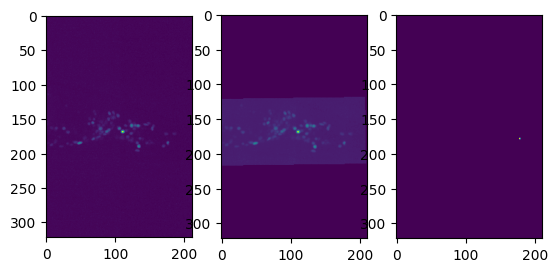

In [16]:
let
    dataset = "2023-05-31-08"
    t = 30

    subplot(1,3,1)
    img_raw = read_img(NRRD(joinpath(param_paths[dataset]["path_dir_nrrd"], param_paths[dataset]["get_basename"](t,2)*".nrrd")))
    imshow(maxprj(img_raw,dims=3))

    subplot(1,3,2)
    img_raw = read_img(NRRD(joinpath(param_paths[dataset]["path_dir_nrrd_crop"], param_paths[dataset]["get_basename"](t,2)*".nrrd")))
    img_size = (322,210,77)
    img_uncrop = uncrop_img_roi(img_raw, data_dicts[dataset]["dict_param_crop_rot"][t], img_size)
    imshow(maxprj(img_uncrop,dims=3))

    subplot(1,3,3)
    hp = uncrop_single_point(dataset, param_paths, data_dicts, t; plot=true)
    
    print(hp)
end

### Take t=30

In [53]:
param_paths

Dict{Any, Any} with 656 entries:
  "2023-01-09-30" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-08-08-11" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2022-12-21-08" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-03-07-03" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-06-23-10" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-10-13-25" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-08-01-02" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-06-04-06" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-01-06-17" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-07-24-19" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-09-06-05" => Dict{String, Any}("path_dir_transformed_activity_marker"=>…
  "2023-01-06-13" => Dict{String, Any}("path_dir_transformed_activity_marker

In [54]:
imgs_label = []
imgs_raw = []

for dataset in keys(data_dicts) # per immob recording
    t = 30
    img_crop = nothing
    img_raw = nothing
    head_pt = nothing
    
    try
        img_crop = read_img(NRRD(joinpath(param_paths[dataset]["path_dir_nrrd_crop"], param_paths[dataset]["get_basename"](t,2)*".nrrd")))
        img_raw = read_img(NRRD(joinpath(param_paths[dataset]["path_dir_nrrd"], param_paths[dataset]["get_basename"](t,2)*".nrrd")))
        img_raw = img_raw[1:322,1:210,:]        
        img_roi = zeros(Bool, size(img_crop))
        head_pt = uncrop_single_point(dataset, param_paths, data_dicts, t)

        img_raw = maxprj(img_raw,dims=3)
        img_label = zeros(Bool, size(img_raw))
        img_label[[x for x in CartesianIndices(size(img_label)) if euclidean_dist(Tuple(x),Tuple(head_pt)) < 25]] .= 1
        push!(imgs_label, img_label)
        push!(imgs_raw, img_raw)
        
    catch e
        continue
    end
end

In [55]:
imgs_raw

381-element Vector{Any}:
 UInt16[0x0236 0x01f6 … 0x01bd 0x01cd; 0x0224 0x01df … 0x01af 0x01f1; … ; 0x0253 0x01f8 … 0x01cd 0x01d0; 0x0257 0x020b … 0x01b6 0x01ba]
 UInt16[0x00f8 0x00e0 … 0x0111 0x00c1; 0x00df 0x00c6 … 0x00bc 0x00e0; … ; 0x00d9 0x00cb … 0x00fe 0x00d5; 0x00cb 0x00c9 … 0x00db 0x00cb]
 UInt16[0x015b 0x0130 … 0x012c 0x011b; 0x0146 0x011e … 0x0127 0x0151; … ; 0x014d 0x012a … 0x0130 0x0128; 0x0142 0x0126 … 0x0124 0x0120]
 UInt16[0x020a 0x01b8 … 0x017c 0x017c; 0x01f3 0x0192 … 0x017a 0x01a6; … ; 0x020b 0x01ce … 0x0193 0x016d; 0x0214 0x01d2 … 0x0171 0x01a7]
 UInt16[0x01f4 0x01d5 … 0x01a2 0x017f; 0x01ea 0x01bc … 0x0171 0x01af; … ; 0x0234 0x01e9 … 0x0175 0x0190; 0x0218 0x01d6 … 0x0190 0x017a]
 UInt16[0x015a 0x0158 … 0x0140 0x0118; 0x014b 0x0122 … 0x011e 0x015d; … ; 0x014d 0x013e … 0x013d 0x012d; 0x0140 0x012d … 0x012d 0x0126]
 UInt16[0x00f4 0x00f3 … 0x00f9 0x00c1; 0x00f3 0x00d3 … 0x00cc 0x00d9; … ; 0x00db 0x00e4 … 0x00dd 0x00c7; 0x00cf 0x00be … 0x00cc 0x00ce]
 UInt16[0x014d 0x0123 …

In [56]:
imgs_label 

381-element Vector{Any}:
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 ⋮
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 1; 0 0 … 1 1]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]


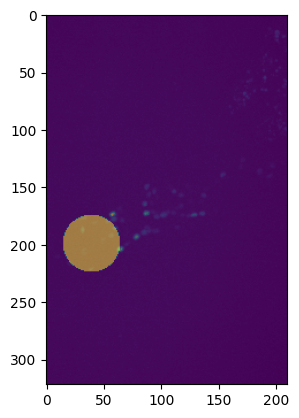

PyObject <matplotlib.image.AxesImage object at 0x7980bcbea2f0>

In [192]:
let
    i = 135
    img = imgs_raw[i]
    lbl = imgs_label[i]

    imshow(img)
    imshow(lbl, alpha=0.5)
end

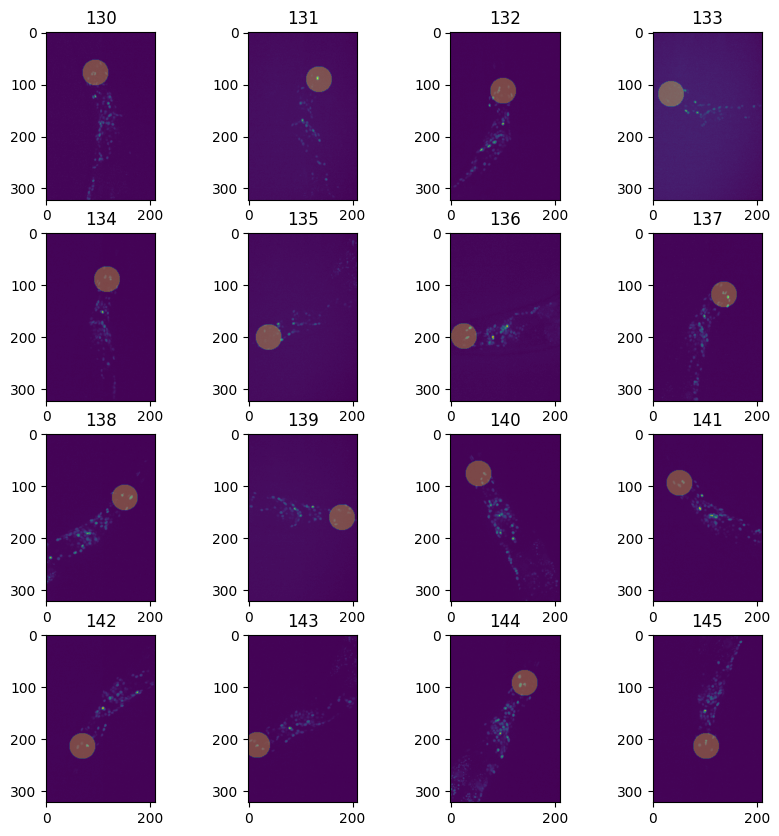

In [188]:
# Some of the immobilized head_pos is wrong, so manually check each of them on a 4x4 grid plot
figure(figsize=(10,10))

# Loop through images 1-16
for (idx,i) in enumerate(collect(130:145))
    # Select the subplot
    subplot(4,4,idx)
    
    # Get image and label for current index
    img = imgs_raw[i]
    lbl = imgs_label[i]
    
    # Plot the image
    imshow(img)
    imshow(lbl, alpha=0.3)
    title("$(i)")
end

In [ ]:
wrong_ones = [12, 20, 63, 64, 71, 109, 118, 125, 135, 161, 167, 204, 224, 227, 228, 246, 249, 260, 265, 275, 292, 326, 329, 339, 364, 369, 372, 380]

In [193]:
@which euclidean_dist

BehaviorDataNIR

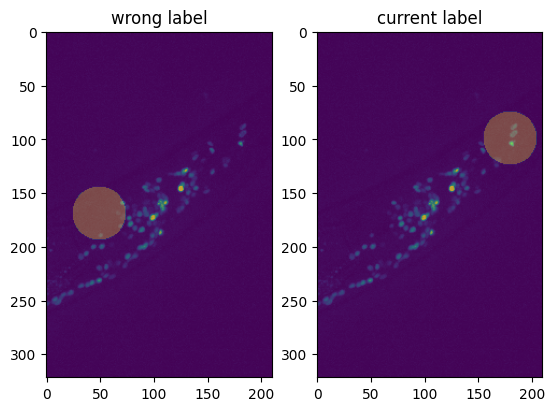

PyObject Text(0.5, 1.0, 'current label')

In [190]:
# manually correct the wrong labels in wrong_ones
let
    i = 381 # load in each of the wrong ones
    img_raw = imgs_raw[i]
    wrong_lbl = imgs_label[i]
    subplot(1,2,1)
    imshow(img_raw)
    imshow(wrong_lbl, alpha=0.3)
    title("wrong label")
    
    head_pt = [100, 180]
    img_label = zeros(Bool, size(img_raw))
    img_label[[x for x in CartesianIndices(size(img_label)) if euclidean_dist(Tuple(x),Tuple(head_pt)) < 25]] .= 1
    imgs_label[i] = img_label
    subplot(1,2,2)
    imshow(imgs_raw[i])
    imshow(imgs_label[i], alpha=0.3)
    title("current label")
end

In [187]:
### write into h5
path_new_h5 = "/store1/candy/prj_unet2d/data/immob_preCropNet.h5"

h5open(path_new_h5, "w") do f
    for i=1:length(imgs_label)
        d = "$(i)"
        create_group(f, d)
        f[d]["img"] = UInt16.(imgs_raw[i])
        f[d]["label"] = imgs_label[i]
    end
end